### Define RUL Thresholds for Alert Levels

- This notebook focuses on defining and documenting the Remaining Useful Life (RUL) threshold values that will form the basis for risk alerting.

- Load sample RUL prediction data or synthetic RUL range to explore value distribution.

- Define thresholds for maintenance alert levels:

  - Normal: RUL above warning threshold (safe zone)

  - Warning: RUL between warning and critical thresholds (maintenance soon)

  - Critical: RUL below critical threshold (immediate maintenance)

- Rationale: thresholds should balance early failure detection with avoiding excessive false alarms.

- Document threshold values and justification for later integration into alerting logic.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Example: Load or simulate RUL prediction data
# For initial exploration, simulate RUL values (e.g. 0 to 130 cycles)
rul_values = np.linspace(0,130,131)

# Define thresholds
warning_threshold = 50  # cycles remaining signaling warning alert
critical_threshold = 30  # cycles remaining signaling critical alert

In [2]:
# Function to categorize  RUL risk levels
def categorize_rul(rul, warning_threshold, critical_threshold):
  if rul <= critical_threshold:
    return 'Critical'
  elif rul <= warning_threshold:
    return 'Warning'
  else:
    return 'Normal'

In [3]:
# Apply categorization across RUL values
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]

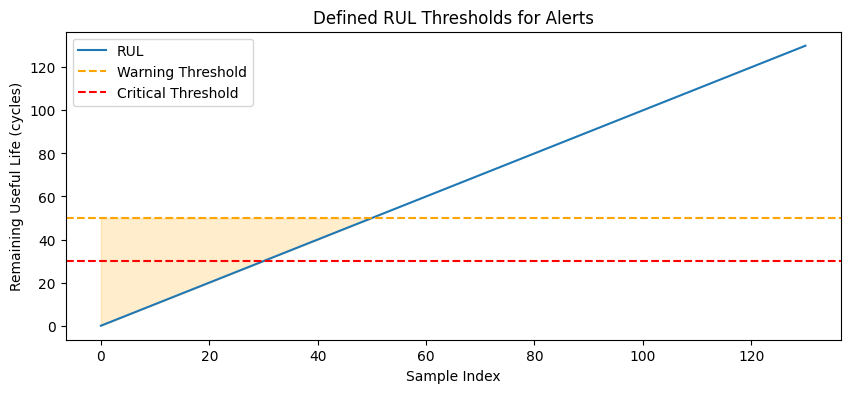

In [4]:
# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.plot(rul_values, rul_values, label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, warning_threshold, rul_values, where=rul_values <= warning_threshold, color='orange', alpha=0.2)
plt.fill_between(rul_values, critical_threshold, rul_values, where=(rul_values <= critical_threshold) & (rul_values > warning_threshold), color='red', alpha=0.2)
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()

### Task

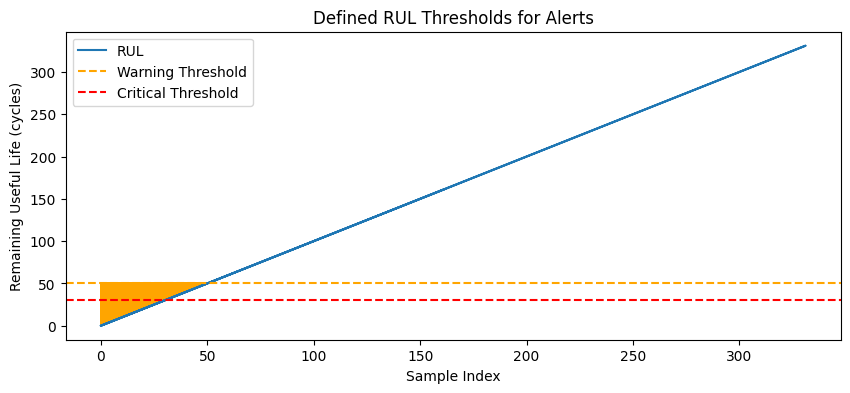

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load metadata CSV (contains RUL column)
metadata = pd.read_csv("/content/drive/MyDrive/data/datasave/sequence_metadata_with_RUL.csv")

# Extract RUL values
rul_values = metadata["RUL"].values

# Define thresholds
warning_threshold = 50   # cycles remaining signaling warning alert
critical_threshold = 30  # cycles remaining signaling critical alert

# Function to categorize RUL risk levels
def categorize_rul(rul, warning_threshold, critical_threshold):
    if rul <= critical_threshold:
        return "Critical"
    elif rul <= warning_threshold:
        return "Warning"
    else:
        return "Normal"

# Apply categorization across RUL values
rul_categories = [categorize_rul(r, warning_threshold, critical_threshold) for r in rul_values]

# Quick visualization of threshold zones
plt.figure(figsize=(10, 4))
plt.plot(rul_values, rul_values, label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, warning_threshold, rul_values, where=rul_values <= warning_threshold, color='orange', alpha=0.2)
plt.fill_between(rul_values, critical_threshold, rul_values, where=(rul_values <= critical_threshold) & (rul_values > warning_threshold), color='red', alpha=0.2)
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()
